<a href="https://colab.research.google.com/github/microprediction/microblog/blob/main/helicopula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install microprediction
!pip uninstall pandas
!pip install pandas==0.23
!pip install matplotlib
!pip install numpy

Hello there. This notebook is a walkthrough of entering a bivariate prediction contest at Microprediction.Org.  

It covers some basics:

* Retrieving data from places like http://dev.microprediction.org/stream_dashboard.html?stream=helicopter_theta

* Interpreting univariate data as bivariate, using conventions
https://github.com/microprediction/microconventions/blob/master/microconventions/zcurve_conventions.py  exposed in the https://pypi.org/project/microprediction/ package. 

* Basics of submission to Microprediction.Org 


**Some related links: **

* SciML Helicopter challenge
https://github.com/SciML/HelicopterSciML.jl/blob/master/papers/

* Articles explaining Microprediction.Org 
https://www.linkedin.com/in/petercotton/detail/recent-activity/posts/

* Crawling 
http://dev.microprediction.org/crawling.html

* Raw data  https://raw.githubusercontent.com/SciML/HelicopterSciML.jl/master/data/Lab-Helicopter_Experimental-data.csv

* Microprediction.Org stream
http://dev.microprediction.org/stream_dashboard.html?stream=z2~helicopter_psi~helicopter_theta~70   

* Another bivariate example 
http://dev.microprediction.org/stream_dashboard.html?stream=z2~seattle_wind_direction~seattle_wind_speed~70. 

* JuliaCon 2020
https://juliacon.org/2020/


* https://arxiv.org/abs/2001.04385 Universal Differential Equations for Scientific Machine Learning







A quick peek at the full time series. 


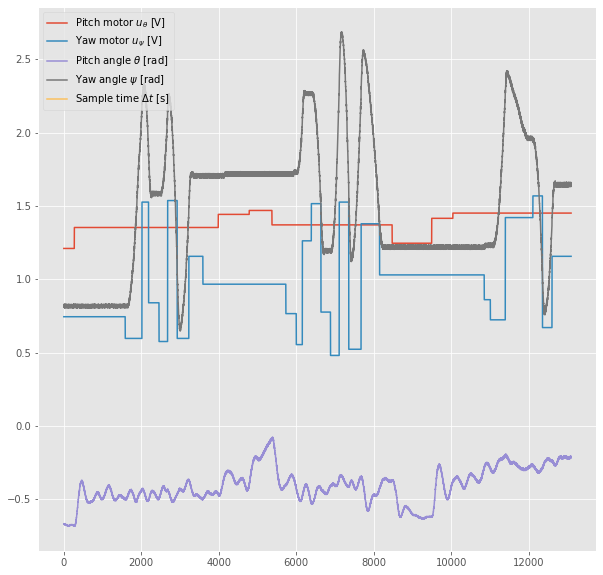

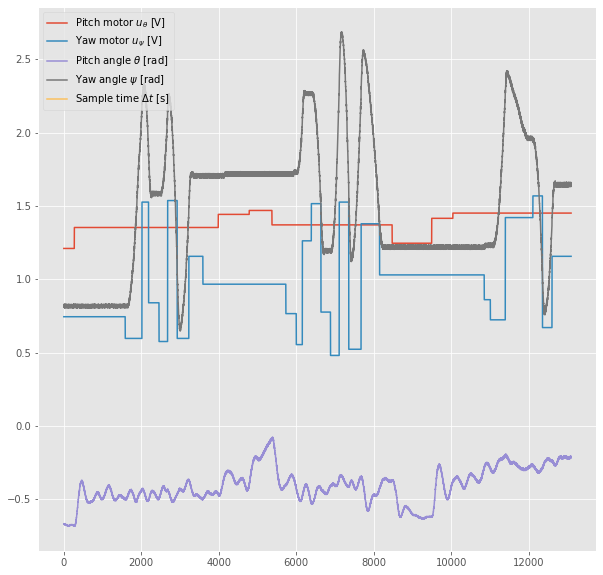

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
df = pd.read_csv('https://raw.githubusercontent.com/SciML/HelicopterSciML.jl/master/data/Lab-Helicopter_Experimental-data.csv')
df.plot()


Now let's jump right to the helicopula. See the 
article called "Helicopulas" on LinkedIn. I suspect there is only one such article. 

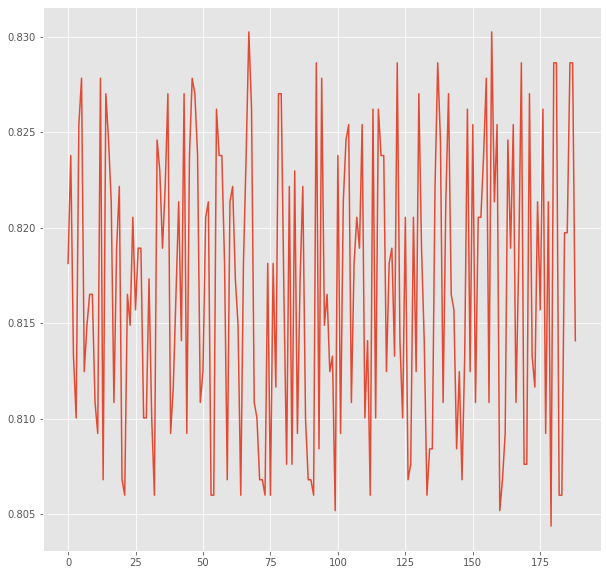

In [ ]:
from microprediction import MicroReader
mr = MicroReader()
xs = mr.get_lagged_values('helicopter_psi.json')
plt.plot(xs)


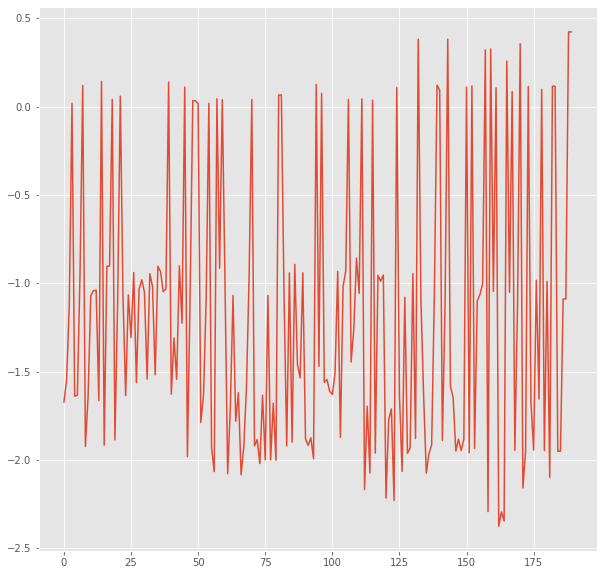

In [ ]:
HELISTREAM = 'z2~helicopter_psi~helicopter_theta~70.json'
lagged_values = mr.get_lagged_values(name=HELISTREAM)
plt.plot(lagged_values)

Thing is, we are looking here at a time series of z-curve data, which is two dimensional data projected onto 1 dimension using a space filling curve. So we probably want to unwind that embedding. Let's take a look at what the Copula function looks like. 


Text(0, 0.5, 'Yaw - transformed')

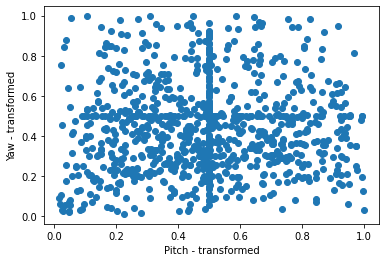

In [ ]:
points = [ mr.from_zcurve( zvalue=z, dim=2) for z in lagged_values ]
zpitch,zyaw = zip(*points)
plt.scatter(zpitch,zyaw)
plt.xlabel('Pitch - transformed')
plt.ylabel('Yaw - transformed')


Text(0, 0.5, 'Yaw - normalized')

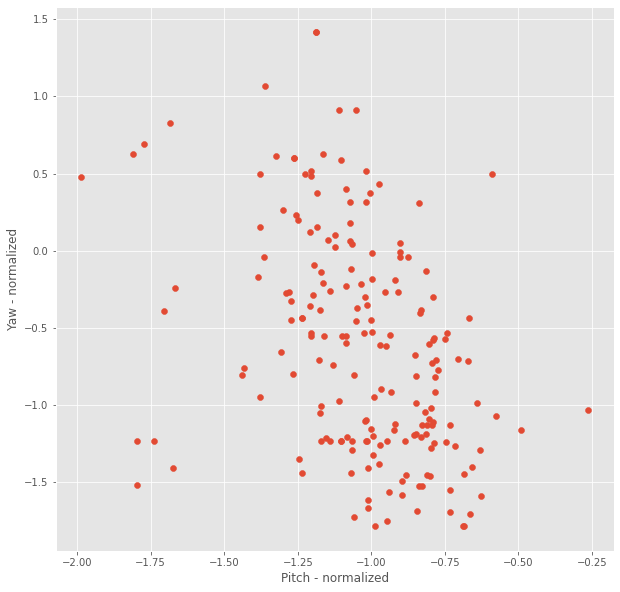

In [ ]:
normalized_points = [ mr.norminv(mr.from_zcurve( zvalue=z, dim=2)) for z in lagged_values ]
npitch,nyaw = zip(*normalized_points)
plt.scatter(npitch,nyaw)
plt.xlabel('Pitch - normalized')
plt.ylabel('Yaw - normalized')

In [ ]:
np.corrcoef(npitch,nyaw)

array([[ 1.       , -0.3906544],
       [-0.3906544,  1.       ]])

Now the beauty of www.Microprediction.org is that by the time you run this script the Copula scatterplot might look very different to when I am running it. So I will refrain from commenting except to say that the normalized predictions of pitch and yaw certainly seem to have a relationship. Maybe we can try fitting this with a parameterized Copula or three. 

In [ ]:
!pip install copulae

  Using cached https://files.pythonhosted.org/packages/0b/b3/00723b63c2d985efaba8df6c48aaefdd7fc35bbf09b6ed4936fa0b6400c6/copulae-0.5.0.tar.gz
ERROR: Package 'copulae' requires a different Python: 3.6.9 not in '>=3.7'


Oops, colab is behind by default. Let's try a different package

In [ ]:
!pip install copulas

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0, 0.5, 'Simulated Yaw - normalized')

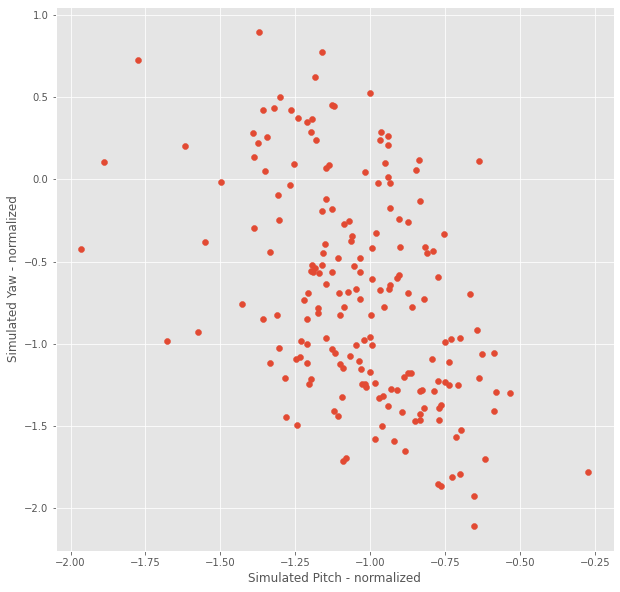

In [ ]:
from copulas.multivariate import GaussianMultivariate
import numpy as np
copula = GaussianMultivariate()
X = np.array( [ npitch,nyaw ]).transpose()
copula.fit(X)

synthetic_points = copula.sample(len(X))
spitch = synthetic_points[0]
syaw = synthetic_points[1]
plt.scatter(spitch,syaw)
plt.xlabel('Simulated Pitch - normalized')
plt.ylabel('Simulated Yaw - normalized')


[0.03610094451849254, -1.0672469552760016, -1.9690746451729477, -1.8686172491352935, -1.0887017383187394, -1.3122998778442794, -1.2717315498370245, -1.0652000760296787, -0.9122638660131569, -1.6785739614697635, -1.6665302478060484, -1.6619376117836788, -1.9500640069339017, 0.12343471500657169, -1.9482905565349529, -1.5715841866448768, 0.4502034936136235, -1.1254618113421575, -1.6714288197769347, -0.949989405622582, -1.6223750101536372, -2.0155584125762993, -1.5859059259341988, -1.5183453779403253, -1.5184286531806988, -0.9571609165270443, -1.6527905062991473, -0.9579851670892091, -1.6228654427258693, 0.014433200913145981, 0.12407788747961657, -1.0366021266267502, -1.902060137589146, 0.015779211312090896, -1.641743107538272, -1.0794734983323173, -1.562631139241636, -1.0875998220235117, -2.0078549886815615, -2.0667133138395375, -0.9014053024463861, -1.023917671790843, -1.6753845377153977, -1.0729553873471303, -1.0813160710019083, -1.886986092114285, -1.655494703227977, -1.889373781852994

Text(0, 0.5, 'Yaw - submitted')

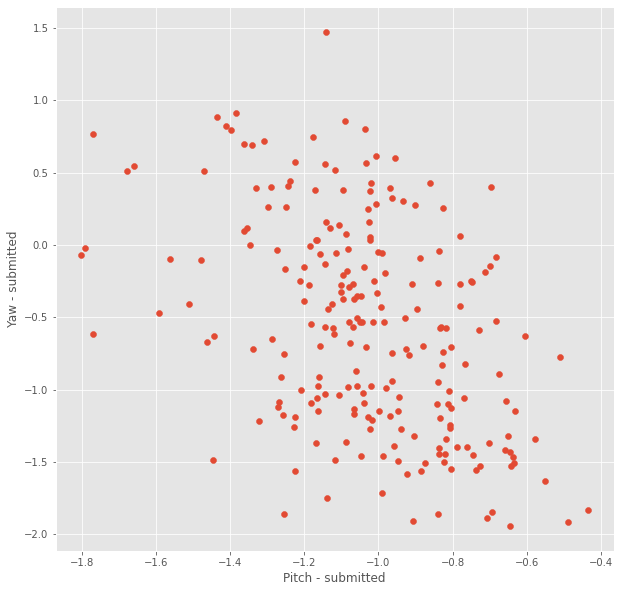

In [ ]:
submitted_points = copula.sample(mr.num_predictions)
qpitch = submitted_points[0]
qyaw   = submitted_points[1]

def project(p,q):
    return mr.to_zcurve([mr.normcdf(p),mr.normcdf(q)] )

values = sorted( [project(p,q)for p,q in zip(qpitch,qyaw) ] )

print(z)
plt.scatter(qpitch,qyaw)
plt.xlabel('Pitch - submitted')
plt.ylabel('Yaw - submitted')

In [ ]:
from microprediction import MicroWriter, new_key
write_key = new_key(difficulty=9)
print(write_key)


In [ ]:
mr = MicroWriter(write_key=write_key)
print(mr.animal)

Bazoo Clam


In [ ]:
stream  = 'z2~helicopter_psi~helicopter_theta~70.json'
horizon = 70
reply   = mr.submit(name=stream,values=values, delay=horizon)

[{'delays': [70],
  'epoch_time': 1594233610.9139411,
  'name': 'z2~helicopter_psi~helicopter_theta~70.json',
  'operation': 'submit',
  'some_values': [-2.4623368639906538,
                  -2.4218456163107493,
                  -2.2630277380838555,
                  -2.210244600930938,
                  -2.183832469765808],
  'success': True,
  'time': '2020-07-08 18:40:10.913930',
  'warn': False}]
[]



In [ ]:
mr.get_active()

['70::z2~helicopter_psi~helicopter_theta~70.json']

In [ ]:
mr.get_performance()

{'70::z2~helicopter_psi~helicopter_theta~70.json': 0.125}

In [ ]:
mr.DELAYS

[70, 310, 910, 3555]

Aside: this package works for pandas 0.23 and not above, which is why I set pandas==0.23.  Code is https://github.com/sdv-dev/Copulas/blob/master/copulas/bivariate/base.py 

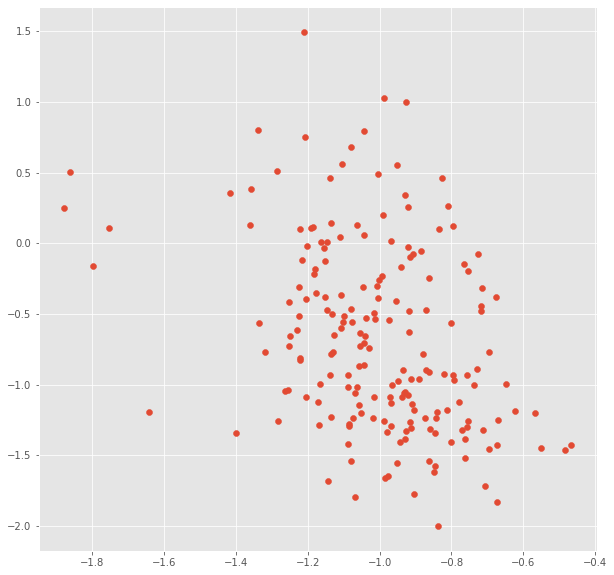

In [ ]:
plt.scatter(synthetic_X[0],synthetic_X[1])